In [1]:
from pybit.unified_trading import HTTP
import pandas as pd
import pandas_ta as ta
import numpy as np
from time import sleep
from asdf import (
    get_dataframe,
    get_full_dataframe,
    get_signal_for_candle,
    SignalType,
    Signal,
)
from decouple import config
import matplotlib.pyplot as plt


API_KEY = config("API_KEY")
SECRET_KEY = config("SECRET_KEY")


session = HTTP()
position_opened = False

df = get_dataframe(session, 'APTUSDT', 720, 300)
df = get_full_dataframe(df)

signals: [Signal] = []

for i in range(0, len(df.index) - 2):
    signal: Signal = get_signal_for_candle(df, i, position_opened)
    if signal.type == SignalType.BUY:
        signals.append(signal)
        position_opened = True
    elif signal.type == SignalType.SELL:
        signals.append(signal)
        position_opened = False
    else:
        pass

/tmp/ipykernel_33746/2325385338.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1706140800
1707480000


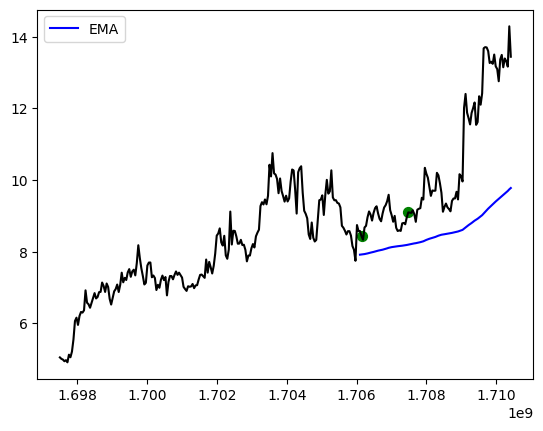

In [2]:
# plt.plot(df["MACDs_12_26_9"], label="signal", color="red")
plt.plot(df["EMA_200"], label="EMA", color="blue")
plt.plot(df['close'], color='black')
for signal in signals:
    if signal.type == SignalType.BUY:
        plt.scatter(signal.unix, signal.entry_point, color='green', s=50, marker='o')
    else:
        plt.scatter(signal.unix, signal.entry_point, color='red', s=50, marker='o')
plt.legend()
plt.show()

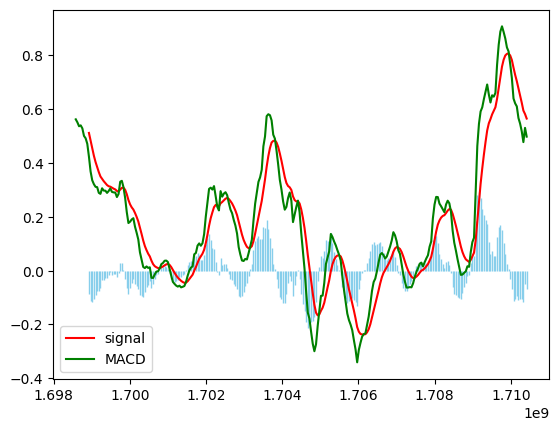

In [3]:
plt.plot(df['MACDs_12_26_9'], label='signal', color='red')
plt.plot(df['MACD_12_26_9'], label='MACD', color='green')
# plt.plot(df['MACDh_12_26_9'], label='histogram', color='blue')
plt.bar(df.index, df['MACDh_12_26_9'], color='skyblue', edgecolor='skyblue')
plt.legend()
plt.show()